Portafolio de Inversión con ETFs en México:
        Categoría        Ticker  Peso  Rendimiento Esperado  Volatilidad  Beta
0      Renta Fija          GOVZ   0.3                 0.060         0.08  0.02
1      Renta Fija  CETETRCISHRS   0.3                 0.045         0.02  0.01
2      Renta Fija  MEXTRACISHRS   0.2                 0.055         0.04  0.03
3  Renta Variable  NAFTRACISHRS   0.1                 0.100         0.15  1.00
4  Renta Variable           IVV   0.1                 0.120         0.18  1.10

Métricas del Portafolio:
Rendimiento Esperado del Portafolio: 6.45%
Riesgo Aproximado del Portafolio: 3.50%
Beta del Portafolio: 0.23
Valor en Riesgo (VaR) al 95%: 0.69%
Ratio de Sharpe: 0.70


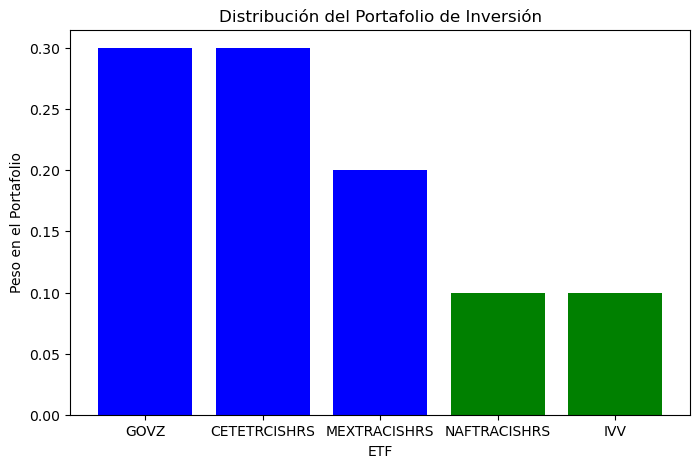

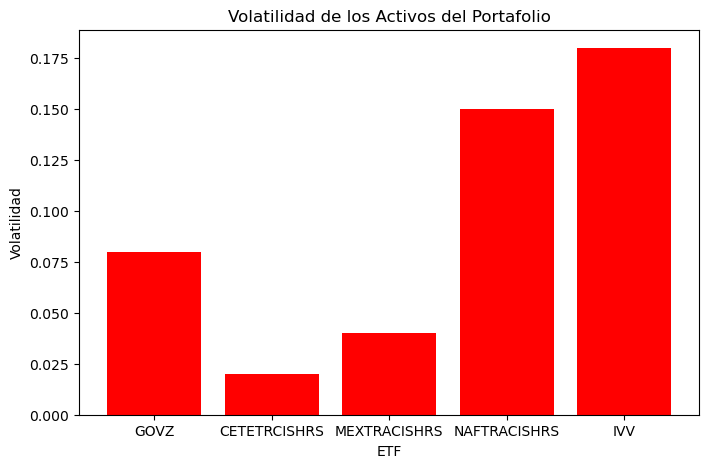

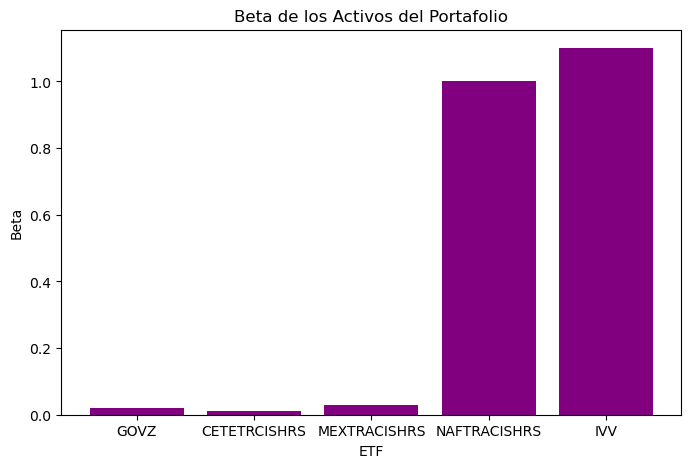

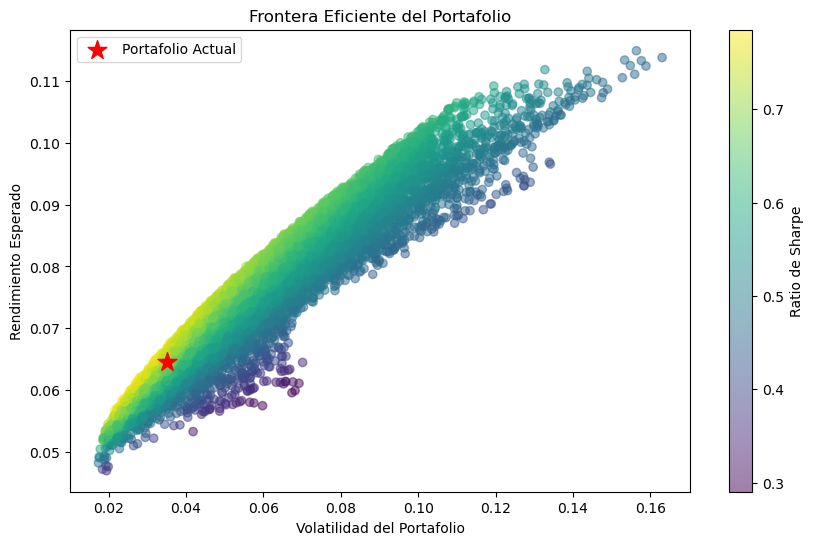


Este portafolio está compuesto en un 80% por renta fija y un 20% por renta variable.
Los activos de renta fija incluyen bonos gubernamentales y corporativos, así como CETES,
lo que proporciona estabilidad y menor riesgo. En la renta variable, se incluyen ETFs
que replican el IPC mexicano y el S&P 500 para lograr diversificación global.

El rendimiento esperado del portafolio es del 6.45% anual, con un
riesgo aproximado del 3.50%. El cálculo del VaR al 95% nos indica que,
en el peor escenario de un día típico, la pérdida esperada no debería superar el 0.69%.

El beta del portafolio es de 0.23, lo que indica su sensibilidad
al mercado. Un beta cercano a 1 indica una correlación alta con el mercado, mientras que
valores menores sugieren menor riesgo de mercado. Finalmente, el Ratio de Sharpe de 0.70
es un indicador clave para evaluar la relación entre riesgo y retorno.

Además, se ha generado la Frontera Eficiente, donde cada punto representa una combinación
diferente de los activos sele

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Definir los ETFs seleccionados y su asignación en el portafolio
etfs = {
    "Renta Fija": {
        "GOVZ": 0.30,  # Bonos gubernamentales de largo plazo
        "CETETRCISHRS": 0.30,  # CETES a corto plazo
        "MEXTRACISHRS": 0.20  # Bonos corporativos
    },
    "Renta Variable": {
        "NAFTRACISHRS": 0.10,  # ETF que replica el IPC
        "IVV": 0.10  # ETF de S&P 500 (para diversificación global)
    }
}

# Simulación de rendimiento anual esperado y volatilidad (en base a datos históricos estimados)
rendimientos_esperados = {
    "GOVZ": 0.06, "CETETRCISHRS": 0.045, "MEXTRACISHRS": 0.055,
    "NAFTRACISHRS": 0.10, "IVV": 0.12
}
volatilidad = {
    "GOVZ": 0.08, "CETETRCISHRS": 0.02, "MEXTRACISHRS": 0.04,
    "NAFTRACISHRS": 0.15, "IVV": 0.18
}
beta = {
    "GOVZ": 0.02, "CETETRCISHRS": 0.01, "MEXTRACISHRS": 0.03,
    "NAFTRACISHRS": 1.00, "IVV": 1.10
}  # Betas estimadas respecto al mercado

# Crear un DataFrame con la información del portafolio
portafolio = []
for categoria, activos in etfs.items():
    for ticker, peso in activos.items():
        portafolio.append({
            "Categoría": categoria,
            "Ticker": ticker,
            "Peso": peso,
            "Rendimiento Esperado": rendimientos_esperados[ticker],
            "Volatilidad": volatilidad[ticker],
            "Beta": beta[ticker]
        })

df = pd.DataFrame(portafolio)

# Calcular métricas del portafolio
rendimiento_portafolio = sum(df["Peso"] * df["Rendimiento Esperado"])
riesgo_portafolio = np.sqrt(sum((df["Peso"] * df["Volatilidad"])**2))  # Aproximación sin correlación
beta_portafolio = sum(df["Peso"] * df["Beta"])
var_95 = st.norm.ppf(0.05, loc=rendimiento_portafolio, scale=riesgo_portafolio)

# Ratio de Sharpe (asumiendo tasa libre de riesgo del 4%)
tasa_libre_riesgo = 0.04
sharpe_ratio = (rendimiento_portafolio - tasa_libre_riesgo) / riesgo_portafolio

# Simulación de la Frontera Eficiente
num_simulaciones = 10000
pesos_simulados = np.random.dirichlet(np.ones(len(df)), num_simulaciones)
rendimientos_simulados = np.dot(pesos_simulados, df["Rendimiento Esperado"].values)
riesgos_simulados = np.sqrt(np.sum((pesos_simulados * df["Volatilidad"].values)**2, axis=1))

# Mostrar el portafolio y métricas
print("Portafolio de Inversión con ETFs en México:")
print(df)
print("\nMétricas del Portafolio:")
print(f"Rendimiento Esperado del Portafolio: {rendimiento_portafolio:.2%}")
print(f"Riesgo Aproximado del Portafolio: {riesgo_portafolio:.2%}")
print(f"Beta del Portafolio: {beta_portafolio:.2f}")
print(f"Valor en Riesgo (VaR) al 95%: {var_95:.2%}")
print(f"Ratio de Sharpe: {sharpe_ratio:.2f}")

# Gráficos
plt.figure(figsize=(8, 5))
plt.bar(df["Ticker"], df["Peso"], color=['blue' if x == "Renta Fija" else 'green' for x in df["Categoría"]])
plt.xlabel("ETF")
plt.ylabel("Peso en el Portafolio")
plt.title("Distribución del Portafolio de Inversión")
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(df["Ticker"], df["Volatilidad"], color='red')
plt.xlabel("ETF")
plt.ylabel("Volatilidad")
plt.title("Volatilidad de los Activos del Portafolio")
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(df["Ticker"], df["Beta"], color='purple')
plt.xlabel("ETF")
plt.ylabel("Beta")
plt.title("Beta de los Activos del Portafolio")
plt.show()

# Gráfico de la Frontera Eficiente
plt.figure(figsize=(10, 6))
plt.scatter(riesgos_simulados, rendimientos_simulados, c=(rendimientos_simulados - tasa_libre_riesgo) / riesgos_simulados, cmap='viridis', alpha=0.5)
plt.colorbar(label='Ratio de Sharpe')
plt.scatter(riesgo_portafolio, rendimiento_portafolio, color='red', marker='*', s=200, label='Portafolio Actual')
plt.xlabel("Volatilidad del Portafolio")
plt.ylabel("Rendimiento Esperado")
plt.title("Frontera Eficiente del Portafolio")
plt.legend()
plt.show()

# Explicación del Portafolio y análisis de métricas
explicacion = f"""
Este portafolio está compuesto en un 80% por renta fija y un 20% por renta variable.
Los activos de renta fija incluyen bonos gubernamentales y corporativos, así como CETES,
lo que proporciona estabilidad y menor riesgo. En la renta variable, se incluyen ETFs
que replican el IPC mexicano y el S&P 500 para lograr diversificación global.

El rendimiento esperado del portafolio es del {rendimiento_portafolio:.2%} anual, con un
riesgo aproximado del {riesgo_portafolio:.2%}. El cálculo del VaR al 95% nos indica que,
en el peor escenario de un día típico, la pérdida esperada no debería superar el {var_95:.2%}.

El beta del portafolio es de {beta_portafolio:.2f}, lo que indica su sensibilidad
al mercado. Un beta cercano a 1 indica una correlación alta con el mercado, mientras que
valores menores sugieren menor riesgo de mercado. Finalmente, el Ratio de Sharpe de {sharpe_ratio:.2f}
es un indicador clave para evaluar la relación entre riesgo y retorno.

Además, se ha generado la Frontera Eficiente, donde cada punto representa una combinación
diferente de los activos seleccionados. El portafolio se marca con un punto rojo
en la gráfica, permitiendo comparar su desempeño con otras combinaciones posibles.
"""
print(explicacion)
